In [1]:
from random import randint, seed
import random
from mpl_toolkits.mplot3d import axes3d

import matplotlib.pyplot as plt
import numpy as np


In [10]:
def generateSet(prototype,nbrEchantillon,coef):
    rand_value=np.random.randn(len(prototype),len(prototype[0]))/coef
    #print(rand_value)
    rand_set=prototype+rand_value
    if nbrEchantillon == 0 :
        return prototype
    else:
        return np.concatenate((rand_set,generateSet(prototype,nbrEchantillon-1,coef)))

def neuroneLim(entre,W,biais):
    a=np.dot(entre,W.T)-biais
    #print("a neurone:",a)
    if a > 0:
        return 1
    return 0

def majW(W, sortie, etiquette,entree):
    #print(W, sortie, etiquette,entree)
    return W+(etiquette-sortie)*entree

def addEtiquette(entreeSet,etiquette):
    dataEtiquete=[]
    for val in entreeSet:
        dataEtiquete.append([val,etiquette])
    return dataEtiquete

In [3]:
pasteque=np.array([[0.2, 0.3, 0.2, 0.95]])
anana=np.array([[0.8, 0.65, 0.6, 0.8]])
pasteques=generateSet(pasteque,1999,4)# -> pour separer les ensembles
ananas=generateSet(anana,1999,4)

Text(0,0.5,'poid')

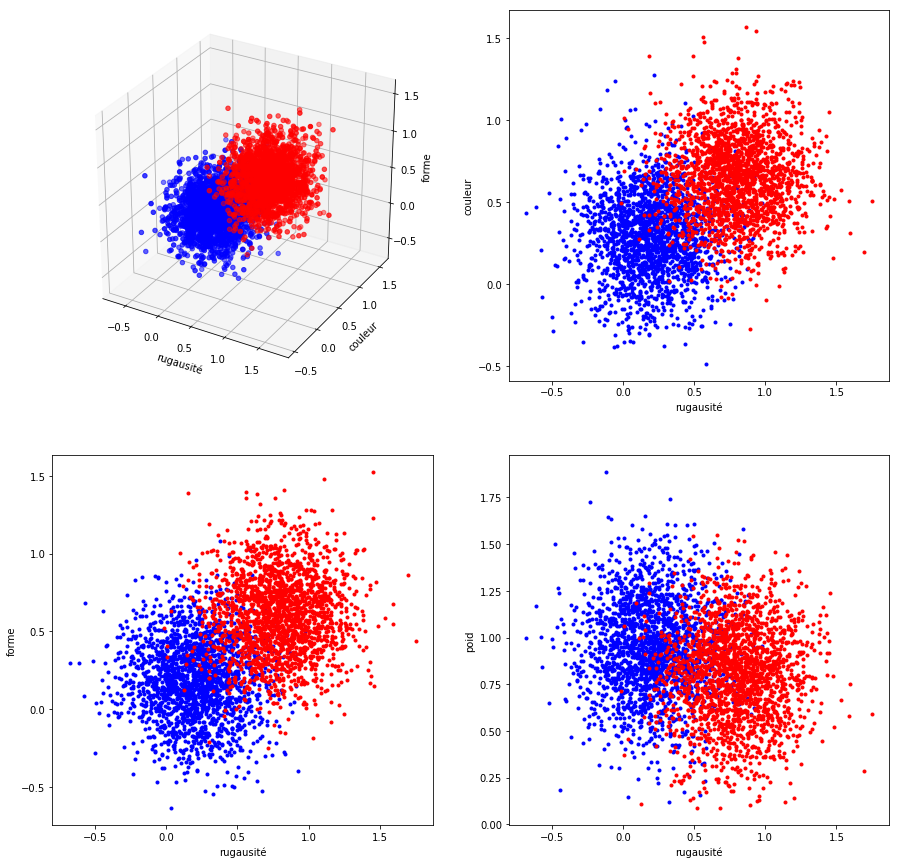

In [4]:
x=np.linspace(0,1,10)

fig = plt.figure(1,figsize=(15,15))
ax = plt.subplot(221, projection='3d')# equivalent a fig.addsubplot

ax.scatter(pasteques.T[0],pasteques.T[1],pasteques.T[2], c='b')
ax.scatter(ananas.T[0],ananas.T[1],ananas.T[2],c="r")
plt.xlabel('rugausité')
plt.ylabel('couleur')
ax.set_zlabel('forme')

ax = plt.subplot(222)
plt.plot(pasteques.T[0],pasteques.T[1],"b.")
plt.plot(ananas.T[0],ananas.T[1],"r.")
plt.xlabel('rugausité')
plt.ylabel('couleur')

ax = plt.subplot(223)
plt.plot(pasteques.T[0],pasteques.T[2],"b.")
plt.plot(ananas.T[0],ananas.T[2],"r.")
plt.xlabel('rugausité')
plt.ylabel('forme')

ax = plt.subplot(224)
plt.plot(pasteques.T[0],pasteques.T[3],"b.")
plt.plot(ananas.T[0],ananas.T[3],"r.")
plt.xlabel('rugausité')
plt.ylabel('poid')

In [6]:
#vecteur de classification
W=np.array([[1, 1, 1, 0]])
biais=1.5

print(neuroneLim(pasteque,W,biais))
print(neuroneLim(anana,W,biais))

0
1


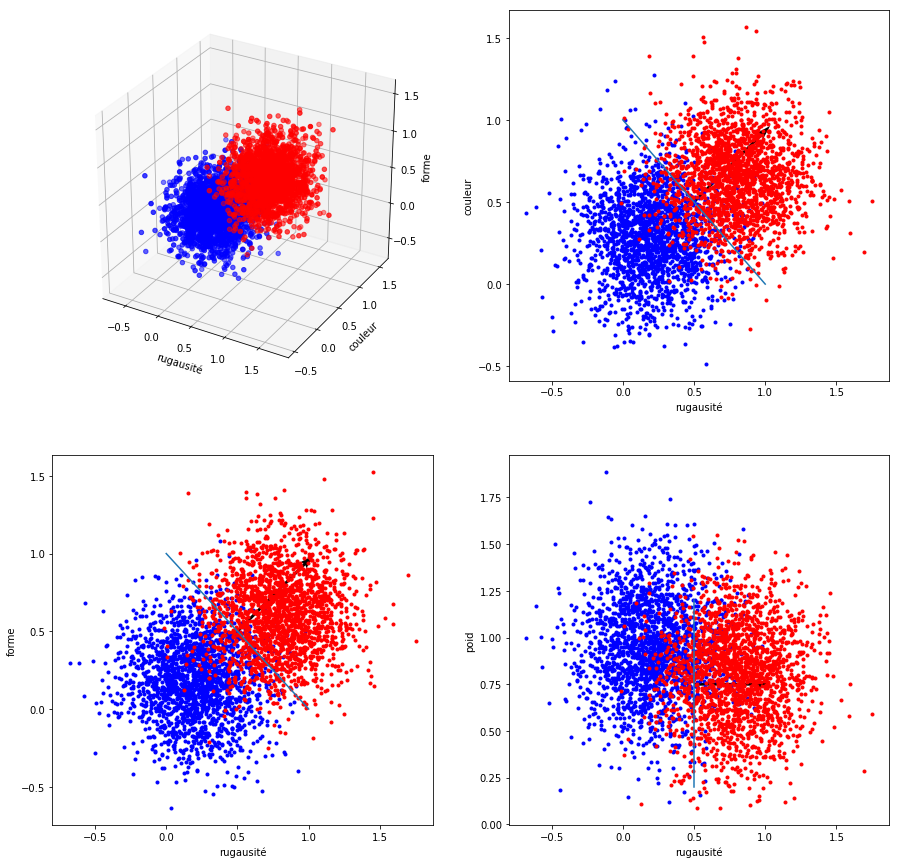

In [7]:
x=np.linspace(0,1,10)

fig = plt.figure(1,figsize=(15,15))
ax = plt.subplot(221, projection='3d')# equivalent a fig.addsubplot

ax.scatter(pasteques.T[0],pasteques.T[1],pasteques.T[2], c='b')
ax.scatter(ananas.T[0],ananas.T[1],ananas.T[2],c="r")
plt.xlabel('rugausité')
plt.ylabel('couleur')
ax.set_zlabel('forme')


ax = plt.subplot(222)
plt.plot(pasteques.T[0],pasteques.T[1],"b.")
plt.plot(ananas.T[0],ananas.T[1],"r.")
plt.xlabel('rugausité')
plt.ylabel('couleur')
plt.quiver(0.5,0.5,1,1,scale=5)
plt.plot(x,1-x)

ax = plt.subplot(223)
plt.plot(pasteques.T[0],pasteques.T[2],"b.")
plt.plot(ananas.T[0],ananas.T[2],"r.")
plt.xlabel('rugausité')
plt.ylabel('forme')
plt.quiver(0.5,0.5,1,1,scale=5)
plt.plot(x,1-x)

ax = plt.subplot(224)
plt.plot(pasteques.T[0],pasteques.T[3],"b.")
plt.plot(ananas.T[0],ananas.T[3],"r.")
plt.xlabel('rugausité')
plt.ylabel('poid')
plt.quiver(0.5,0.75,1,0,scale=5)
plt.plot(0.5+x*0,x+0.2)

In [8]:
resultP=[]
for val in pasteques:
    resultP.append(neuroneLim(val,W,biais))
   
resultA=[]
for val in ananas:
    resultA.append(neuroneLim(val,W,biais))

print("pasteques:",sum(resultP)," somme:", (2000-sum(resultP))*100/1999)
print("ananas:", sum(resultA),"somme:", sum(resultA)*100/1999)

pasteques: 68  somme: 96.64832416208104
ananas: 1789 somme: 89.49474737368685


In [11]:
pasteques=addEtiquette(pasteques,0)
ananas=addEtiquette(ananas,1)
W=np.array([[1, 1, 1, 0]])

In [12]:
datas=pasteques+ananas
random.shuffle(datas)
print(len(datas))
datasApprentissage=datas[:3000]
datasTest=datas[3000:]
print(len(datasApprentissage)+len(datasTest))


4000
4000


In [13]:
print("W initial:",W)    
for (val,etiquete) in datasApprentissage:
    sortie=neuroneLim(val,W,biais)
    W=majW(W, sortie, etiquete,val)

print("W final:",W)    
erreur=[0]


for (val,etiquete) in datasTest:
    sortie=neuroneLim(val,W,biais)
    #print(sortie,etiquete)
    if sortie != etiquete:
        erreur.append(erreur[len(erreur)-1]+1)
    else:
        erreur.append(erreur[len(erreur)-1])

W initial: [[1 1 1 0]]
W final: [[ 4.24481528  2.02601754  2.33854134 -1.98798401]]


1001


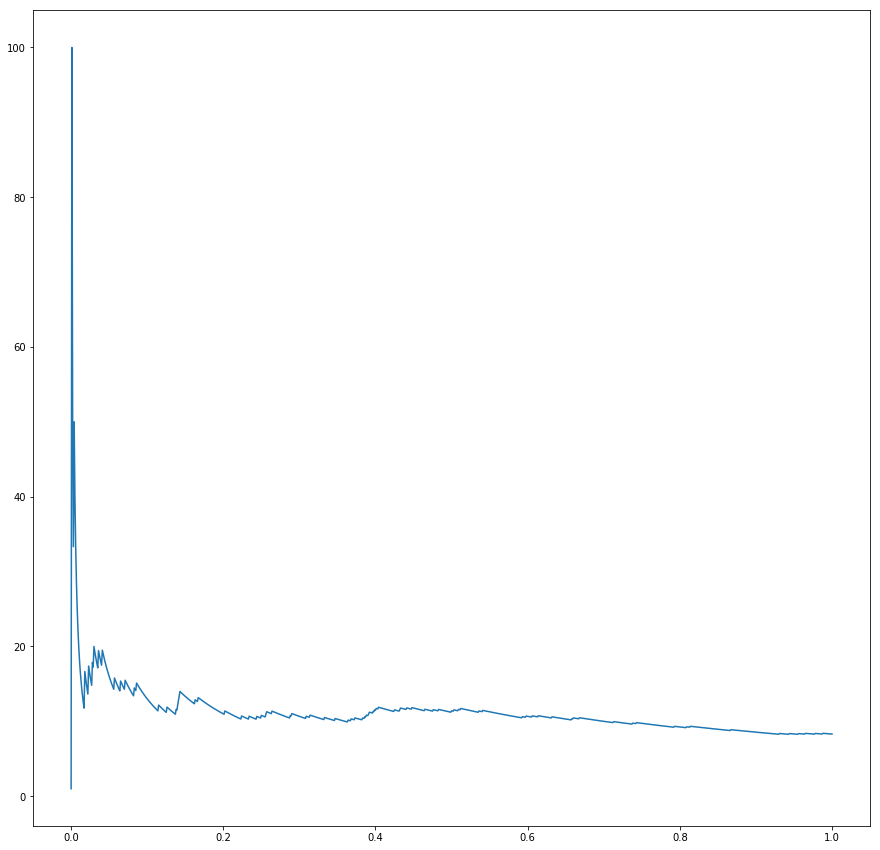

In [14]:
erreur=[1]+[erreur[i]*100/i for i in range(1,1001)]
print(len(erreur))
fig = plt.figure(1,figsize=(15,15))
ax = plt.subplot(111)
index=np.linspace(0,1,1001)
plt.plot(index,erreur)